# DACON 심장 질환 예측 경진 대회

1. train.csv : 학습 데이터
- id: 데이터 고유 id
- age: 나이
- sex: 성별 (여자 = 0, 남자 = 1)
- cp: 가슴 통증(chest pain) 종류 
    - 0 : asymptomatic 무증상
    - 1 : atypical angina 일반적이지 않은 협심증
    - 2 : non-anginal pain 협심증이 아닌 통증
    - 3 : typical angina 일반적인 협심증
- trestbps: (resting blood pressure) 휴식 중 혈압(mmHg)
- chol: (serum cholestoral) 혈중 콜레스테롤 (mg/dl)
- fbs: (fasting blood sugar) 공복 중 혈당 (120 mg/dl 이하일 시 = 0, 초과일 시 = 1)
- restecg: (resting electrocardiographic) 휴식 중 심전도 결과 
    - 0: showing probable or definite left ventricular hypertrophy by Estes' criteria
    - 1: 정상
    - 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- thalach: (maximum heart rate achieved) 최대 심박수
- exang: (exercise induced angina) 활동으로 인한  협심증 여부 (없음 = 0, 있음 = 1)
- oldpeak: (ST depression induced by exercise relative to rest) 휴식 대비 운동으로 인한 ST 하강
- slope: (the slope of the peak exercise ST segment) 활동 ST 분절 피크의 기울기
    - 0: downsloping 하강
    - 1: flat 평탄
    - 2: upsloping 상승
- ca: number of major vessels colored by flouroscopy 형광 투시로 확인된 주요 혈관 수 (0~3 개) 
    - Null 값은 숫자 4로 인코딩됨 
- thal: thalassemia 지중해빈혈 여부
    - 0 = Null 
    - 1 = normal 정상
    - 2 = fixed defect 고정 결함
    - 3 = reversable defect 가역 결함
- target: 심장 질환 진단 여부
    - 0: < 50% diameter narrowing
    - 1: > 50% diameter narrowing

2. test.csv : 테스트 데이터
- id: 데이터 고유 id
- age: 나이
- sex: 성별 (여자 = 0, 남자 = 1)
- cp: 가슴 통증(chest pain) 종류
- trestbps: (resting blood pressure) 휴식 중 혈압(mmHg)
- chol: (serum cholestoral) 혈중 콜레스테롤 (mg/dl)
- fbs: (fasting blood sugar) 공복 중 혈당 (120 mg/dl 이하일 시 = 0, 초과일 시 = 1)
- restecg: (resting electrocardiographic) 휴식 중 심전도 결과 
- thalach: (maximum heart rate achieved) 최대 심박수
- exang: (exercise induced angina) 활동으로 인한  협심증 여부 (없음 = 0, 있음 = 1)
- oldpeak: (ST depression induced by exercise relative to rest) 휴식 대비 운동으로 인한 ST 하강
- slope: (the slope of the peak exercise ST segment) 활동 ST 분절 피크의 기울기
- ca: number of major vessels colored by flouroscopy 형광 투시로 확인된 주요 혈관 수 (0~3 개) 
- thal: thalassemia 지중해빈혈 여부


3. sample_submissoin.csv : 제출 양식
- id: 데이터 고유 id
- target: 심장 질환 진단 여부



In [163]:
import numpy as np
import pandas as pd
import math

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
# one-hot encoding
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.pipeline import make_pipeline

import matplotlib.pyplot as plt
import seaborn as sb

import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False
%matplotlib inline


In [248]:
df = pd.read_csv('cardiac_dataset/train.csv', index_col='id')
# print(df.info())
# print(df.isnull().sum())
x_data = df.iloc[:,:-1]
y_data = df.loc[:,['target']]

# x - categorical : cp, restecg, slope, ca, thal
ctg_col = ['cp','restecg','slope','ca','thal']
x_data = pd.get_dummies(x_data, columns=ctg_col, drop_first=True)

ctg_col2 = x_data.columns[8:]
x_ctg = x_data[ctg_col2]

# x - continue : age, trestbps, chol, thalach, oldpeak
con_col = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
x_data_con = x_data[con_col]

scaler = MinMaxScaler()
x_con_scd = scaler.fit_transform(x_data_con)
x_data[con_col] = x_con_scd

fnum = len(x_data.columns)
lnum = len(y_data.columns)

# null 값 추가
x_data.insert(18, 'ca_4',np.zeros(len(x_data)))

fnum = len(x_data.columns)
lnum = len(y_data.columns)

x_data.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'cp_1', 'cp_2', 'cp_3', 'restecg_1', 'restecg_2', 'slope_1', 'slope_2',
       'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

In [249]:
df = pd.read_csv('cardiac_dataset/train.csv', index_col='id')

ctg_col = ['cp','restecg','slope','ca','thal']
df = pd.get_dummies(df, columns=ctg_col, drop_first=True)
ctg_col2 = list(x_data.columns[8:].values)


con_col = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
x_con = df[con_col]

scaler = MinMaxScaler()
x_con_scd = scaler.fit_transform(x_con)
df[con_col] = x_con_scd

fnum = len(x_data.columns)
df.insert(18, 'ca_4',np.zeros(len(x_data)))

fnum = len(x_data.columns)

df.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'target', 'cp_1', 'cp_2', 'cp_3', 'restecg_1', 'restecg_2', 'slope_1',
       'slope_2', 'ca_1', 'ca_2', 'ca_4', 'ca_3', 'thal_1', 'thal_2',
       'thal_3'],
      dtype='object')

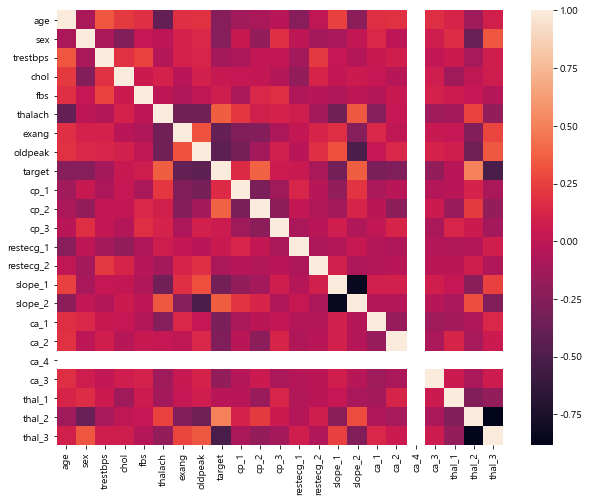

In [215]:
plt.figure(figsize=(10,8))
sb.heatmap(df.corr())
plt.show()

In [222]:
ctg_col2

['cp_1',
 'cp_2',
 'cp_3',
 'restecg_1',
 'restecg_2',
 'slope_1',
 'slope_2',
 'ca_1',
 'ca_2',
 'ca_3',
 'ca_4',
 'thal_1',
 'thal_2',
 'thal_3']

<Figure size 720x576 with 0 Axes>

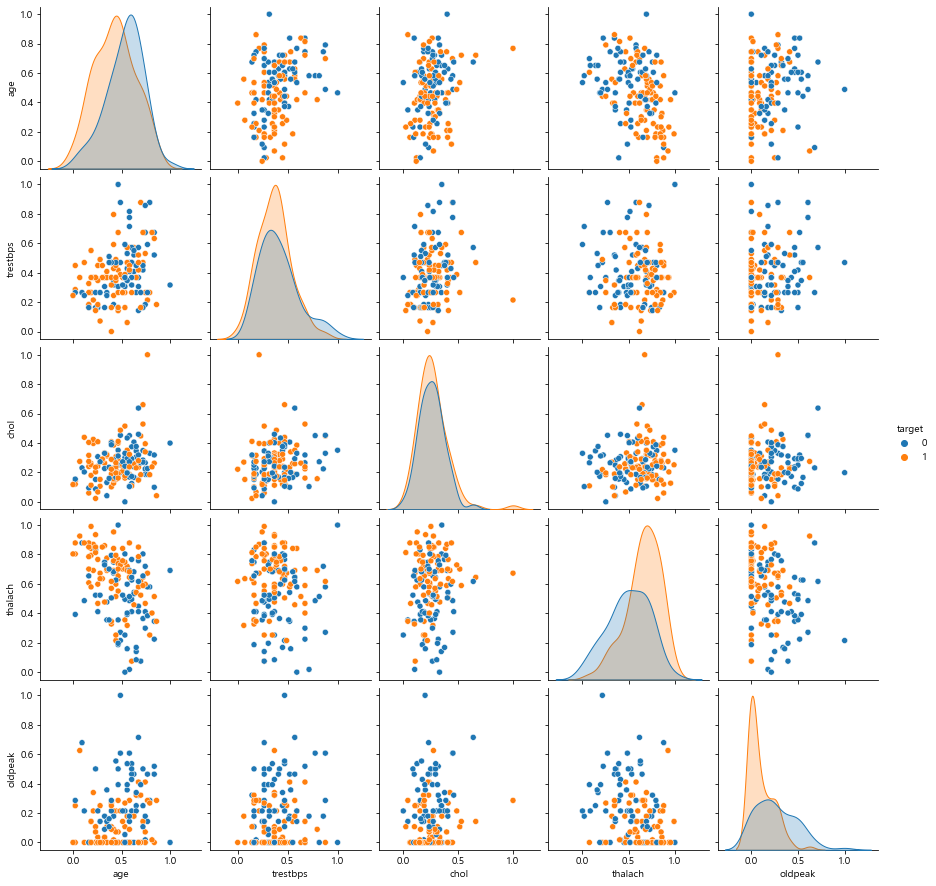

In [226]:
plt.figure(figsize=(10,8))
sb.pairplot(df[con_col+['target']], hue='target')
plt.show()

In [168]:
plt.figure(figsize=(10,8))
x_data['target'] = y_data.values
sb.pairplot(x_data[np.hstack(ctg_col2.values, ['target'])], hue='target')
plt.show()

TypeError: _vhstack_dispatcher() takes 1 positional argument but 2 were given

<Figure size 720x576 with 0 Axes>

In [251]:
# 연속만 pca 적용
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(x_data[con_col])
pca_col = pd.DataFrame(data=printcipalComponents, columns = ['pc1', 'pc2'])
# 주성분으로 이루어진 데이터 프레임 구성


In [256]:
x_data2 = principalDf.join(x_data[ctg_col2])
fnum2=len(x_data2.columns)
x_data2

,principal component1,principal component2,cp_1,cp_2,cp_3,restecg_1,restecg_2,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.024843,-0.060826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.120534,0.267515,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.178840,0.678114,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.180577,-0.016477,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.513324,-0.131630,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,-0.143862,0.079177,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
147,-0.244082,-0.241813,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
148,0.324675,0.260388,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
149,-0.120905,-0.183413,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [258]:
x_train, x_valid, y_train, y_valid = train_test_split(x_data2, y_data, 
                                                      test_size=0.2,
                                                      stratify=y_data)

dense = Dense(units=lnum, input_dim=fnum2, activation='sigmoid')
model = Sequential([dense])

model.compile(loss='binary_crossentropy', optimizer=Adam(0.1), metrics=['acc'])
h = model.fit(x_train, y_train, epochs=1000, validation_data=(x_valid, y_valid))

Epoch 1/1000
4/4 [==============================] - 0s 33ms/step - loss: nan - acc: 0.4167 - val_loss: nan - val_acc: 0.4516
Epoch 2/1000
4/4 [==============================] - 0s 8ms/step - loss: nan - acc: 0.4500 - val_loss: nan - val_acc: 0.4516
Epoch 3/1000
4/4 [==============================] - 0s 6ms/step - loss: nan - acc: 0.4500 - val_loss: nan - val_acc: 0.4516
Epoch 4/1000
4/4 [==============================] - 0s 6ms/step - loss: nan - acc: 0.4500 - val_loss: nan - val_acc: 0.4516
Epoch 5/1000
4/4 [==============================] - 0s 6ms/step - loss: nan - acc: 0.4500 - val_loss: nan - val_acc: 0.4516
Epoch 6/1000
4/4 [==============================] - 0s 6ms/step - loss: nan - acc: 0.4500 - val_loss: nan - val_acc: 0.4516
Epoch 7/1000
4/4 [==============================] - 0s 5ms/step - loss: nan - acc: 0.4500 - val_loss: nan - val_acc: 0.4516
Epoch 8/1000
4/4 [==============================] - 0s 5ms/step - loss: nan - acc: 0.4500 - val_loss: nan - val_acc: 0.4516
Epoch 9

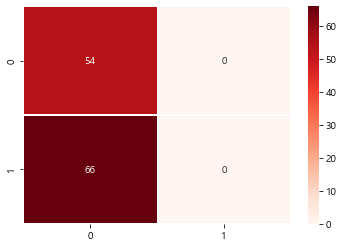

In [259]:
pred_train = (model.predict(x_train)>0.5)+0
conf_train = confusion_matrix(y_train, pred_train)

sb.heatmap(conf_train,
           annot=True, 
           fmt='d', 
           linewidths=0.2, 
           cmap='Reds')
plt.show()

In [260]:
print(accuracy_score(y_train, pred_train)

,f1_score(y_train, pred_train))

0.45 0.0


In [266]:
# 전체 pca 적용
from sklearn.decomposition import PCA
pca = PCA(n_components=3) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(x_data)
x_data_pca = pd.DataFrame(data=printcipalComponents, columns = ['pc1', 'pc2','pc3'])
# 주성분으로 이루어진 데이터 프레임 구성


In [268]:
fnum_pca = len(x_data_pca.columns)

x_train, x_valid, y_train, y_valid = train_test_split(x_data_pca, y_data, 
                                                      test_size=0.2,
                                                      stratify=y_data)

dense = Dense(units=lnum, input_dim=fnum_pca, activation='sigmoid')
model = Sequential([dense])

model.compile(loss='binary_crossentropy', optimizer=Adam(0.1), metrics=['acc'])
h = model.fit(x_train, y_train, epochs=1000, validation_data=(x_valid, y_valid))


Epoch 1/1000
4/4 [==============================] - 0s 32ms/step - loss: 0.8483 - acc: 0.4833 - val_loss: 0.6891 - val_acc: 0.5806
Epoch 2/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.6895 - acc: 0.5750 - val_loss: 0.5811 - val_acc: 0.6129
Epoch 3/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.5787 - acc: 0.6833 - val_loss: 0.5131 - val_acc: 0.7742
Epoch 4/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.5147 - acc: 0.7583 - val_loss: 0.4752 - val_acc: 0.7742
Epoch 5/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.4734 - acc: 0.8000 - val_loss: 0.4549 - val_acc: 0.7742
Epoch 6/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.4534 - acc: 0.7833 - val_loss: 0.4471 - val_acc: 0.7742
Epoch 7/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.4427 - acc: 0.7750 - val_loss: 0.4429 - val_acc: 0.7742
Epoch 8/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.4364 - acc: 0.7

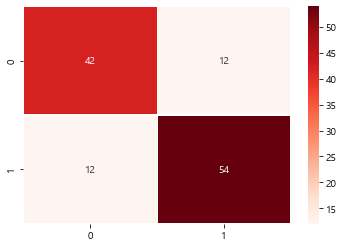

In [269]:
pred_train = (model.predict(x_train)>0.5)+0
conf_train = confusion_matrix(y_train, pred_train)

sb.heatmap(conf_train,
           annot=True, 
           fmt='d', 
           linewidths=0.2, 
           cmap='Reds')
plt.show()

In [271]:
print(accuracy_score(y_train, pred_train),f1_score(y_train, pred_train))

0.8 0.8181818181818182


In [273]:
# 원핫 인코딩만
x_train, x_valid, y_train, y_valid = train_test_split(x_data, y_data, 
                                                      test_size=0.2,
                                                      stratify=y_data)

dense = Dense(units=lnum, input_dim=fnum, activation='sigmoid')
model = Sequential([dense])

model.compile(loss='binary_crossentropy', optimizer=Adam(0.1), metrics=['acc'])
h = model.fit(x_train, y_train, epochs=1000, validation_data=(x_valid, y_valid))


Epoch 1/1000
4/4 [==============================] - 0s 28ms/step - loss: 0.6397 - acc: 0.6250 - val_loss: 0.4987 - val_acc: 0.7419
Epoch 2/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.4731 - acc: 0.7750 - val_loss: 0.4158 - val_acc: 0.8387
Epoch 3/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.3982 - acc: 0.8417 - val_loss: 0.3800 - val_acc: 0.8065
Epoch 4/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.3475 - acc: 0.8500 - val_loss: 0.4002 - val_acc: 0.7742
Epoch 5/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.3297 - acc: 0.8583 - val_loss: 0.3898 - val_acc: 0.8065
Epoch 6/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.3008 - acc: 0.8667 - val_loss: 0.3873 - val_acc: 0.8065
Epoch 7/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2819 - acc: 0.8750 - val_loss: 0.3824 - val_acc: 0.7419
Epoch 8/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2692 - acc: 0.

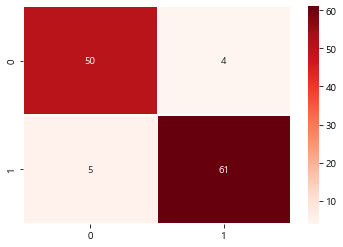

0.925 0.9312977099236641


In [275]:
pred_train = (model.predict(x_train)>0.5)+0
conf_train = confusion_matrix(y_train, pred_train)

sb.heatmap(conf_train,
           annot=True, 
           fmt='d', 
           linewidths=0.2, 
           cmap='Reds')
plt.show()

print(accuracy_score(y_train, pred_train),f1_score(y_train, pred_train))

In [209]:
xd_test = pd.read_csv('cardiac_dataset/test.csv', index_col='id')

# yd_test = dfTest.loc[:,['target']]

# x - categorical : cp, restecg, slope, ca, thal
xd_test = pd.get_dummies(xd_test, columns=ctg_col, drop_first=True)

ctg_col2 = xd_test.columns[8:]

# x - continue : age, trestbps, chol, thalach, oldpeak
xd_test_con = xd_test[con_col]

xd_test_con_scd = scaler.transform(xd_test_con)

xd_test[con_col] = x_con_scd
xd_test.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'cp_1', 'cp_2', 'cp_3', 'restecg_1', 'restecg_2', 'slope_1', 'slope_2',
       'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

In [210]:
xd_test.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'cp_1', 'cp_2', 'cp_3', 'restecg_1', 'restecg_2', 'slope_1', 'slope_2',
       'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

In [212]:
pred_test = (model.predict(xd_test)>0.5) + 0

In [213]:
pred_test

array([[0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
    